## GDV - LO1: Visualization basics, chart types

In [1]:
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype
from plotnine import *
from plotnine.data import mpg

#### Dataset
For my LO1 report, I dived into the basics of visualization and chart types. My first task was to choose a suitable and interesting dataset. Since I am a big football fan, I wanted to conduct this project with a football dataset. On Kaggle I found a dataset with data from the English Premier League 2020-2021. https://www.kaggle.com/rajatrc1705/english-premier-league202021. I decided to use the book ‘Fundamentals of Data Visualization’ by Claus O. Wilke to guide me throughout this project.

In [2]:
data = pd.read_csv('EPL_20_21.csv')
data.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0


### 20/21 Premier League Goals by Club

I wanted to display the number of goals scored by each club in the 20/21 premier league season. To achieve this, I needed to prepare the data. Firstly, I grouped the dataset by club and then I selected the columns 'Club' and 'Goals' and summed the goals scored by each club. Next, the dataset was sorted by the total scored goals in ascending order. In this situation I am allowed to sort the bars, because the data does not have a natural ordering of the categorial variable ‘Club’ (Wilke, 2019).

In [81]:
club_goals = data.groupby('Club')[['Club', 'Goals']].sum()
club_goals_sorted = club_goals.sort_values('Goals', ascending=True).reset_index()
club_goals_sorted.head()

,Club,Goals
0,Sheffield United,19
1,Fulham,26
2,Burnley,32
3,West Bromwich Albion,33
4,Wolverhampton Wanderers,34


Since I wanted to visualize an amount, a bar chart would be ideal (Wilke, 2019, Chapter 5.1). However, the x axis would have too much text and the club names would overlap each other, making it impossible to read. For this reason, the chart was flipped (x and y axes were swapped). After swapping the axes, a compact figure was obtained, in which all visual elements, including text, are horizontally oriented, thus making the figure easy to read (Wilke, 2019). A ‘dot plot’ would also fit this data, because the dataset isn’t large, and the chart would be less cluttered than with bars (Wilke, 2019).

### Bar Plot

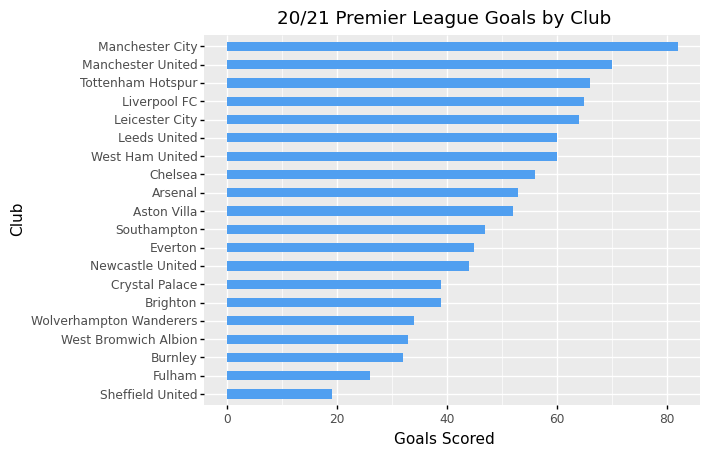

<ggplot: (138237951287)>

In [4]:
(ggplot(club_goals_sorted, aes(x=club_goals_sorted.Club, y=club_goals_sorted.Goals))
 + geom_col(fill="#509FF0", width=.5)
 + coord_flip()
 + scale_x_discrete(limits=club_goals_sorted.Club)
 + labs(y='Goals Scored', x='Club', title='20/21 Premier League Goals by Club')
)

### Dot Plot

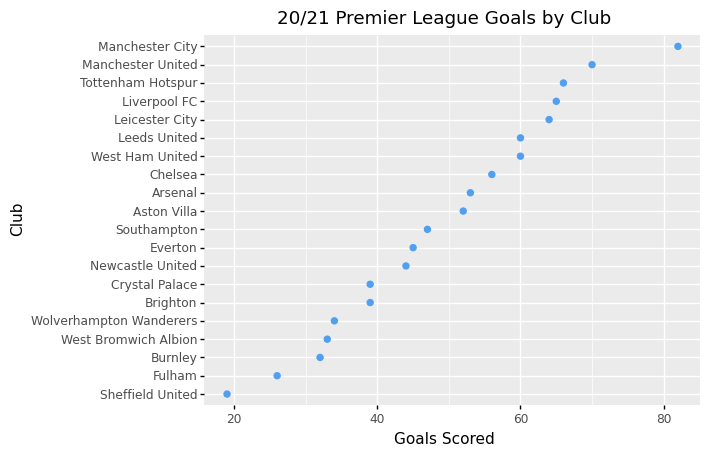

<ggplot: (138238168796)>

In [5]:
(ggplot(club_goals_sorted, aes(x=club_goals_sorted.Club, y=club_goals_sorted.Goals))
 + geom_point(color="#509FF0", size=2)
 + coord_flip()
 + scale_x_discrete(limits=club_goals_sorted.Club)
 + labs(y='Goals Scored', x='Club', title='20/21 Premier League Goals by Club')
)

### 20/21 Premier League Matches by Age

Next, I wanted to figure out which age groups play the most matches. Each bar in the plot represents 1 year. Unlike the last visualization, this one has a natural ordering of the categorial variable 'Age'. In this case, the bars were arranged in order of the increasing age. Sorting by bar height in this situation would be very confusing and make no sense (Wilke, 2019, Chapter 6.1).

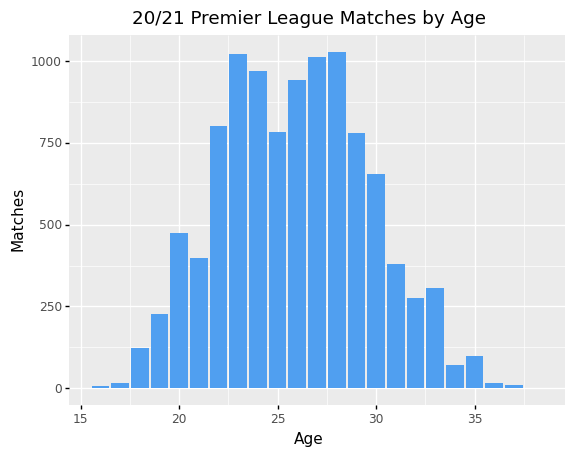

<ggplot: (138238056735)>

In [6]:
(ggplot(data, aes(x=data.Age, y=data.Matches))
 + geom_col(fill="#509FF0", width=0.9)
 + labs(y='Matches', x='Age', title='20/21 Premier League Matches by Age')
)

### Minutes Played by Age from Top 4 Clubs

This type of visualization is pretty much the same as the one before, however, this plot includes two different categorial variables at the same time (Age and Club). I used a ‘stacked bar plot’, because the sum of the stacked bars is a meaningful value (Wilke, 2019, Chapter 6.3), as I want to figure out the total minutes played by each age group from the best clubs.

In [12]:
clubs_top = data.groupby('Club')[['Club', 'Goals']].sum()
club_top_sorted = clubs_top.sort_values('Goals', ascending=False).reset_index()

# top 4 teams as list
lst_top4 = club_top_sorted.Club.head(4).tolist()

# show players from top 4 teams
players_top4 = data[data['Club'].isin(lst_top4)]
players_top4.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
27,Ederson,Manchester City,BRA,GK,26,36,36,3240,0,1,1090,83.1,0,0,0.00,0.01,3,0
28,Rúben Dias,Manchester City,POR,DF,23,32,32,2843,1,0,2671,93.6,0,0,0.07,0.00,4,0
29,Rodri,Manchester City,ESP,MF,24,34,31,2748,2,2,2728,91.5,1,1,0.08,0.06,6,0
30,Raheem Sterling,Manchester City,ENG,FW,25,31,28,2536,10,7,1127,85.4,0,1,0.43,0.17,4,0
31,João Cancelo,Manchester City,POR,DF,26,28,27,2299,2,3,2094,85.7,0,0,0.08,0.19,5,1


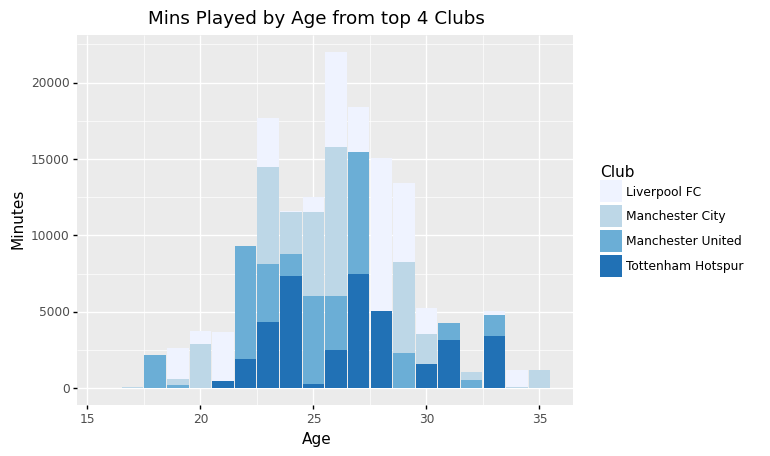

<ggplot: (138238060096)>

In [13]:
(ggplot(players_top4, aes(x=players_top4.Age, y=players_top4.Mins, fill=players_top4.Club))
 + geom_col(width=0.95)
 + scale_fill_brewer(palette="Blues")
 + labs(y='Minutes', x='Age', title='Mins Played by Age from top 4 Clubs')
)

### Passes Attempted vs Succuessful Passes (%) by Position

Another interesting visualization is to see the amount of attempted and completed passes by each player and their position. For this type of visualization, I used a scatterplot to show one quantitative variable relative to another. I had to remember that overplotting is a common issue when making scatterplots where the dots overlap and cover other dots, sometimes making it difficult to see relationships between the variables and dots. To solve this problem, I read through chapter 18.1 to gather some information and tips.

The first tip was to use a bit of partial transparency that is applied to every dot. By doing this, overplotted areas appeared darker than others, because the shade reflects the density of dots in that specific area. (Wilke, 2019, Chapter 18.1). However, the problem is not solved yet according to Wilke, because it is hard to estimate the number of points in the darker areas and for a reader looking at the visualization for the first time might wonder why some areas are darker than others. This brings me to the second tip I learned from the book; add a small amount of jitter to the dots. However, applying too much jitter would result in misleading data, because the points in the plot do not actually represent the dataset. The figure below is the result of my dataset after applying these tips and tricks.


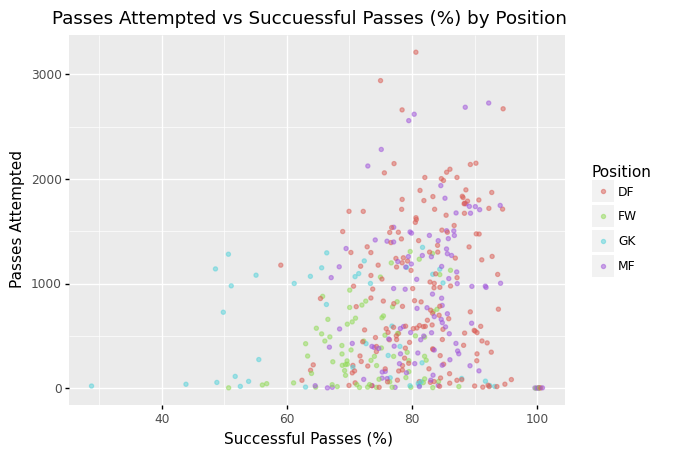

<ggplot: (138241712903)>

In [100]:
passes = data.drop(data[data.Passes_Attempted < 1].index)
passes = passes.drop(passes[passes.Perc_Passes_Completed < 1].index)

positions = ['GK', 'DF', 'MF', 'FW']
passes = passes[passes['Position'].isin(positions)]

(ggplot(passes, aes(x='Perc_Passes_Completed', y='Passes_Attempted', color='Position'))
 + geom_jitter(size = 1.2, width = 1, height = 1, alpha = 0.50)
 + labs(y='Passes Attempted', x='Successful Passes (%)', title='Passes Attempted vs Succuessful Passes (%) by Position')
)

### 20/21 Premier League Goals by Position

Next I would like to visualize, which positions score the most goals.
- GK = Goalkeeper
- DF = Defender
- MF = Midfielder
- FW = Forward

In [101]:
position_goals = data.groupby('Position')[['Position', 'Goals']].sum()
position_goals_sorted = position_goals.sort_values('Goals', ascending=False).reset_index()

positions = ['GK', 'DF', 'MF', 'FW']
position_goals_sorted = position_goals_sorted[position_goals_sorted['Position'].isin(positions)]

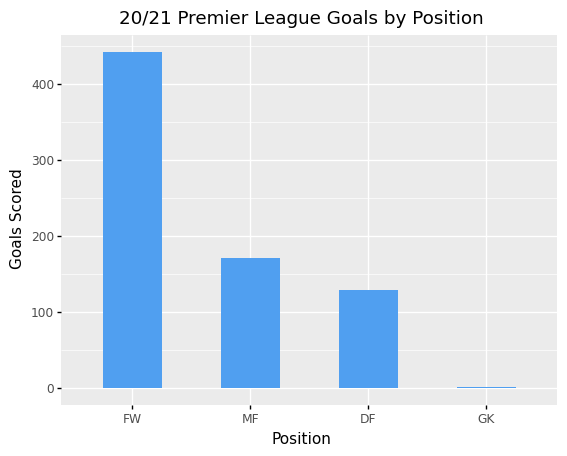

<ggplot: (138243294332)>

In [108]:
(ggplot(position_goals_sorted, aes(x=position_goals_sorted.Position, y=position_goals_sorted.Goals))
 + geom_col(fill="#509FF0", width=0.5)
 + scale_x_discrete(limits=position_goals_sorted.Position)
 + labs(y='Goals Scored', x='Position', title='20/21 Premier League Goals by Position')
)